In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import util, assign, grants, people, transactions, grantPlanning
import settings

In [2]:
run = util.run(settings.RUN_START, settings.RUN_END)

In [3]:
gr = grants.grants(settings.MYGRANTS)
gr.from_projects  (settings.PROJECTS, settings.PROJECTS_DATE)
print(gr.all_names())
# Restrict attention to just these
#gr.set_names(['Venice'])

['ToyGaia', 'Venice']


In [4]:
pe = people.people(settings.PEOPLE)
print(pe.all_names())
# Restrict attention to just these
#pe.set_names(['Bloggs'])

['Bloggs', 'Jones']


In [5]:
an = assign.assign(settings.ASSIGN, gr, pe, run)
tr = transactions.transactions(settings.TRANSACTIONS, gr, pe, run)
gpa = grantPlanning.grants_people_assign(gr, pe, an, tr, run)

Category,Awarded,Spent
Salary,100000,20000
Travel,10000,2000
Equipment,30000,5000
Consumables,30000,5000


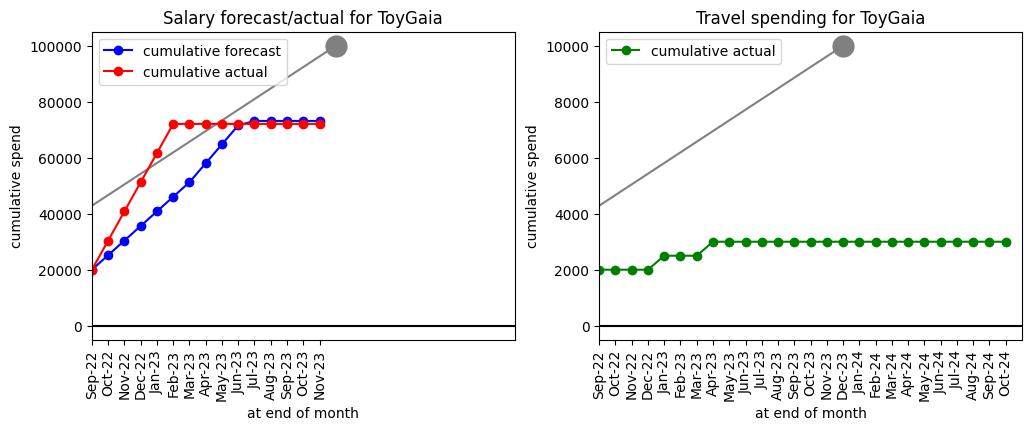

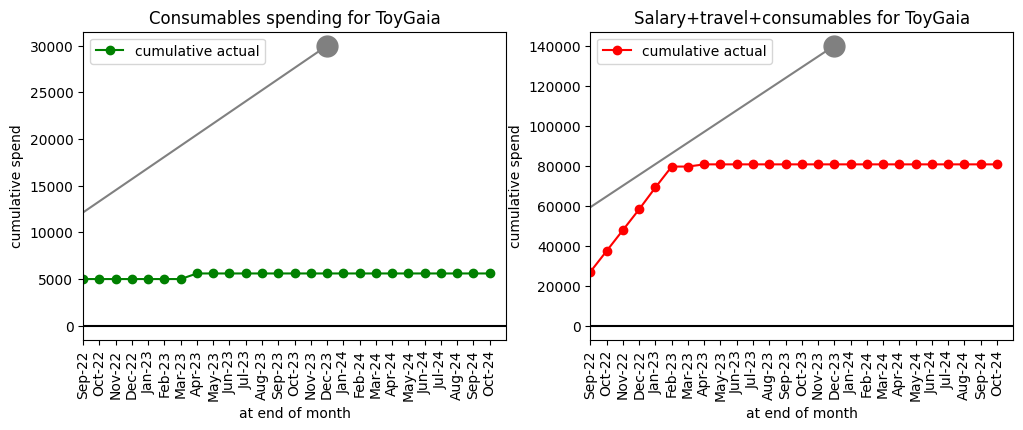

Month,Bloggs,Jones,,Monthly,Cumulative,Balance
Sep-22,,,,0,20000,80000
Oct-22,100%,,,5208,25208,74792
Nov-22,100%,,,5208,30417,69583
Dec-22,100%,,,5208,35625,64375
Jan-23,100%,,,5208,40833,59167
Feb-23,100%,,,5208,46042,53958
Mar-23,100%,,,5208,51250,48750
Apr-23,100%,50%,,6771,58021,41979
May-23,100%,50%,,6771,64792,35208
Jun-23,100%,50%,,6771,71563,28437


Month,Bloggs,,Monthly,Cumulative,Balance
Sep-22,,,0,20000,80000
Oct-22,100%,,5208,30416,74792
Nov-22,100%,,5208,40832,69584
Dec-22,100%,,5208,51248,64376
Jan-23,100%,,5208,61664,59168
Feb-23,100%,,5208,72080,53960
Mar-23,,,0,72080,53960
Apr-23,,,0,72080,53960
May-23,,,0,72080,53960
Jun-23,,,0,72080,53960


Month,Salary,Travel,Equipment,Consumables
Sep-22,,,,
Oct-22,5208,,,
Nov-22,5208,,,
Dec-22,5208,,,
Jan-23,5208,500,,
Feb-23,5208,,,
Mar-23,,,,
Apr-23,,500,,600
May-23,,,,
Jun-23,,,,


Category,Awarded,Spent
Salary,200000,10000
Travel,30000,5000
Equipment,30000,5000
Consumables,30000,5000


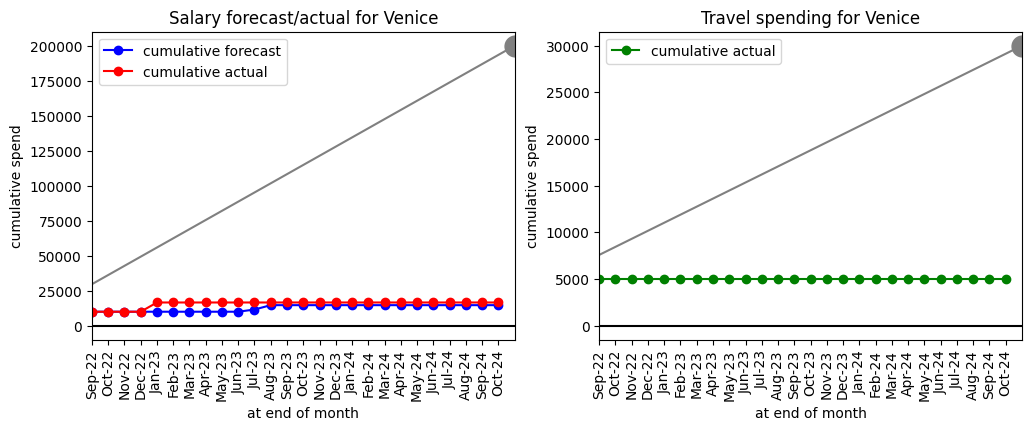

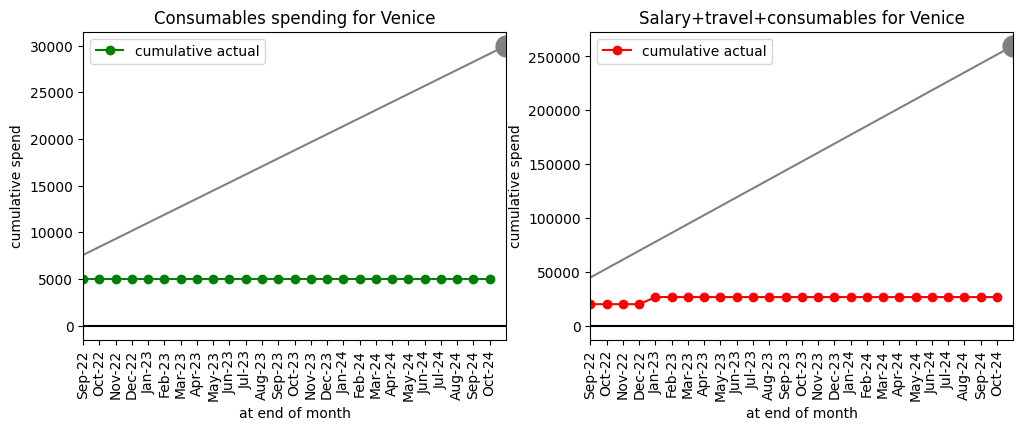

Month,Jones,,Monthly,Cumulative,Balance
Sep-22,,,0,10000,190000
Oct-22,,,0,10000,190000
Nov-22,,,0,10000,190000
Dec-22,,,0,10000,190000
Jan-23,,,0,10000,190000
Feb-23,,,0,10000,190000
Mar-23,,,0,10000,190000
Apr-23,,,0,10000,190000
May-23,,,0,10000,190000
Jun-23,,,0,10000,190000


Month,Jones,,Monthly,Cumulative,Balance
Sep-22,,,0,10000,190000
Oct-22,,,0,10000,190000
Nov-22,,,0,10000,190000
Dec-22,,,0,10000,190000
Jan-23,106%,,3300,16600,186700
Feb-23,,,0,16600,186700
Mar-23,,,0,16600,186700
Apr-23,,,0,16600,186700
May-23,,,0,16600,186700
Jun-23,,,0,16600,186700


Month,Salary,Travel,Equipment,Consumables
Sep-22,,,,
Oct-22,,,,
Nov-22,,,,
Dec-22,,,,
Jan-23,3300,,,
Feb-23,,,,
Mar-23,,,,
Apr-23,,,,
May-23,,,,
Jun-23,,,,


In [6]:
for grant_name in sorted(gpa.grants.keys()):
    if not grant_name in gr.grant_name_set:
        continue
    display(HTML(gpa.html_grant_header(grant_name)))
    if not 'awarded' in gpa.grants[grant_name]:
        continue

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,   1)
    gpa.plot_forecast_actual_salary(grant_name)
    
    plt.subplot(1,2,   2)
    gpa.plot_category(grant_name, "Travel")
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,   1)
    gpa.plot_category(grant_name, "Consumables")
    
    plt.subplot(1,2,   2)
    gpa.plot_actual_salary_travel_consumables(grant_name)
    plt.show()
    
    out = gpa.html_forecast_salary  (grant_name)
    if out: display(HTML(out))
    out = gpa.html_actual_salary    (grant_name)
    if out: display(HTML(out))
    out = gpa.html_actual_categories(grant_name)
    if out: display(HTML(out))